<a href="https://colab.research.google.com/github/6058ah/DataScienceStudy/blob/master/Chapter6%EC%A3%BC%EC%84%B1%EB%B6%84%EB%B6%84%EC%84%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#주성분분석(PCA)
####데이터에 있는 분산이 큰 방향을 찾는 것
####주성분 : 원본 데이터에 있는 어떤 방향
####주성분 벡터의 원소 개수는 원본 데이터셋에 있는 특성 개수와 동일
####주성분은 원본 차원과 같고 주성분으로 바꾼 데이터는 차원이 줄어든다

In [4]:
!wget https://bit.ly/fruits_300 -O fruits_300.npy
import numpy as np
fruits = np.load('fruits_300.npy')
fruits_2d = fruits.reshape(-1,100*100)

--2021-03-24 11:09:09--  https://bit.ly/fruits_300
Resolving bit.ly (bit.ly)... 67.199.248.11, 67.199.248.10
Connecting to bit.ly (bit.ly)|67.199.248.11|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://github.com/rickiepark/hongong-ml/raw/master/fruits_300.npy [following]
--2021-03-24 11:09:09--  https://github.com/rickiepark/hongong-ml/raw/master/fruits_300.npy
Resolving github.com (github.com)... 192.30.255.112
Connecting to github.com (github.com)|192.30.255.112|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/rickiepark/hongong-ml/master/fruits_300.npy [following]
--2021-03-24 11:09:10--  https://raw.githubusercontent.com/rickiepark/hongong-ml/master/fruits_300.npy
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:4

In [5]:
from sklearn.decomposition import PCA
pca = PCA(n_components=50)
pca.fit(fruits_2d)

PCA(copy=True, iterated_power='auto', n_components=50, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [6]:
print(pca.components_.shape)

(50, 10000)


In [8]:
import matplotlib.pyplot as plt
def draw_fruits(arr,ratio=1):
  n = len(arr) #n은 샘플의 개수
  #한 줄에 10개씩 이미지를 그림. 샘플 개수를 10으로 나누어 전체 행 개수를 계산함
  rows = int(np.ceil(n/10))
  #행이 1개이면 열의 개수는 샘플 개수. 그렇지 않으면 10개
  cols = n if rows < 2 else 10
  fig, axs = plt.subplots(rows, cols, figsize=(cols*ratio, rows*ratio), squeeze = False)
  for i in range(rows):
    for j in range(cols):
      if i*10 + j < n: #n개까지만 그림
        axs[i,j].imshow(arr[i*10+j],cmap='gray_r')
      axs[i,j].axis('off')
  plt.show()

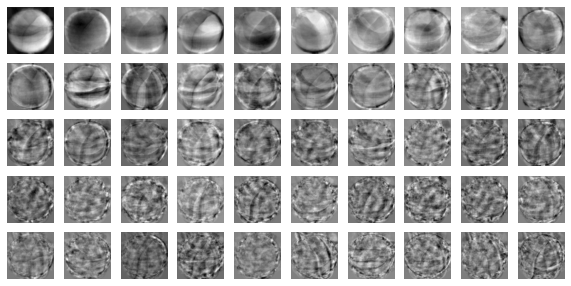

In [11]:
draw_fruits(pca.components_.reshape(-1,100,100))

In [12]:
print(fruits_2d.shape)

(300, 10000)


In [14]:
fruits_pca = pca.transform(fruits_2d)
print(fruits_pca.shape)

(300, 50)


##원본 데이터 재구성

In [15]:
fruits_inverse = pca.inverse_transform(fruits_pca)
print(fruits_inverse.shape)

(300, 10000)


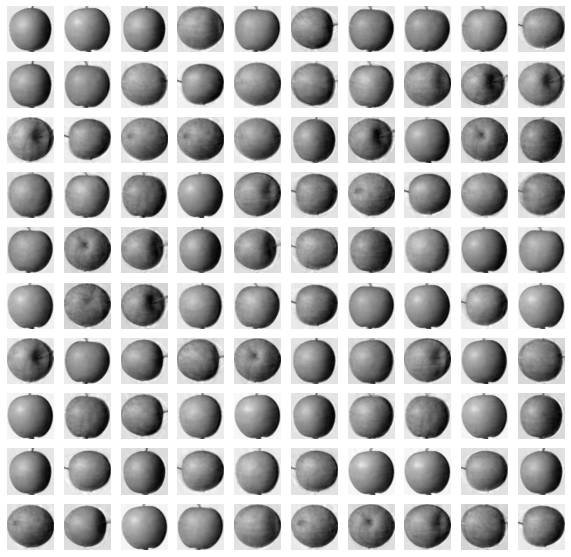

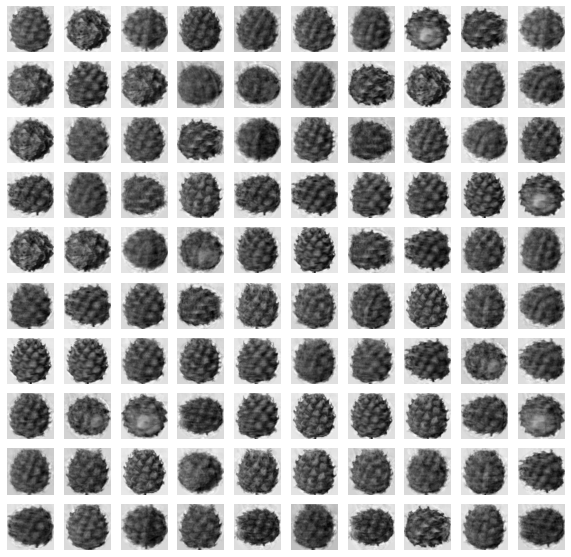

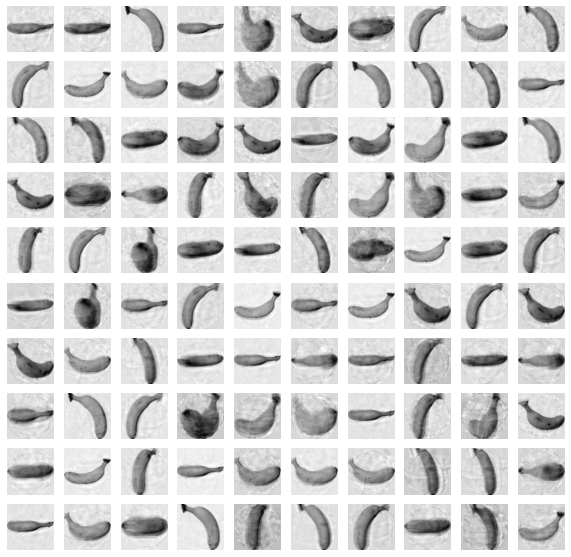

In [16]:
fruits_reconstruct = fruits_inverse.reshape(-1,100,100)
for start in [0,100,200]:
  draw_fruits(fruits_reconstruct[start:start+100])
  print("\n")

##설명된 분산
####주성분이 원본 데이터의 분산을 얼마나 잘 나타내는지 기록한 값

In [17]:
print(np.sum(pca.explained_variance_ratio_))

0.9214853648618744


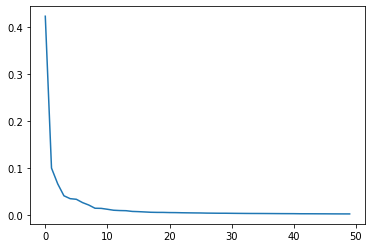

In [18]:
plt.plot(pca.explained_variance_ratio_)
plt.show()

##다른 알고리즘과 함께 사용하기

In [19]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [21]:
target = np.array([0]*100+[1]*100+[2]*100)

In [22]:
from sklearn.model_selection import cross_validate
scores= cross_validate(lr,fruits_2d,target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

0.9966666666666667
1.3710005760192872


In [23]:
scores=cross_validate(lr,fruits_pca,target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

1.0
0.02363109588623047


In [24]:
pca = PCA(n_components=0.5)
pca.fit(fruits_2d)

PCA(copy=True, iterated_power='auto', n_components=0.5, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [25]:
print(pca.n_components_)

2


In [26]:
fruits_pca=pca.transform(fruits_2d)
print(fruits_pca.shape)

(300, 2)


In [27]:
scores = cross_validate(lr,fruits_pca,target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

0.9933333333333334
0.03822484016418457


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


In [29]:
from sklearn.cluster import KMeans
km=KMeans(n_clusters=3,random_state=42)
km.fit(fruits_pca)
print(np.unique(km.labels_,return_counts=True))

(array([0, 1, 2], dtype=int32), array([ 91,  99, 110]))


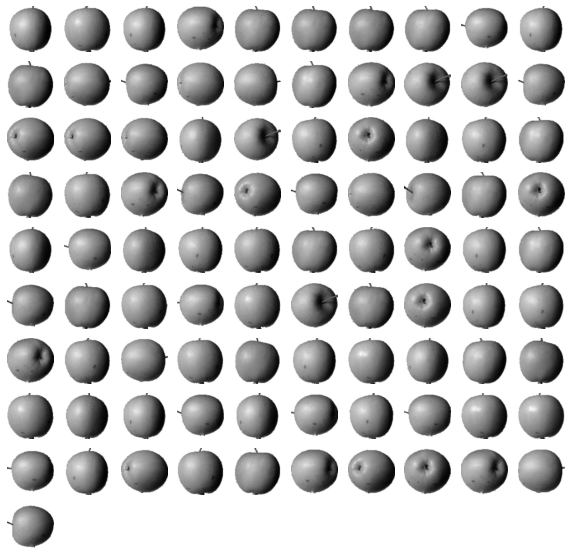

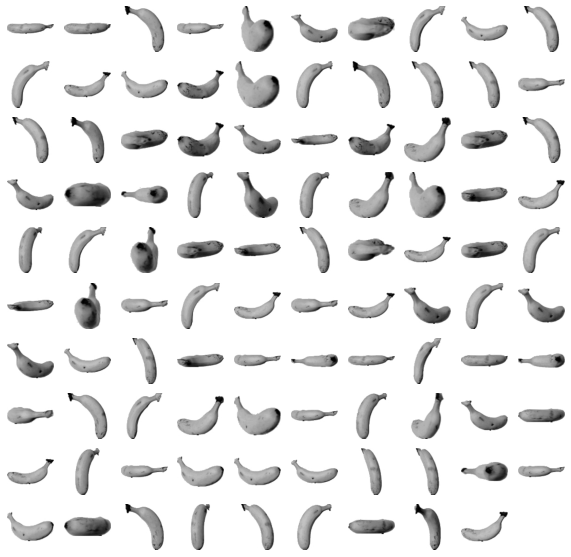

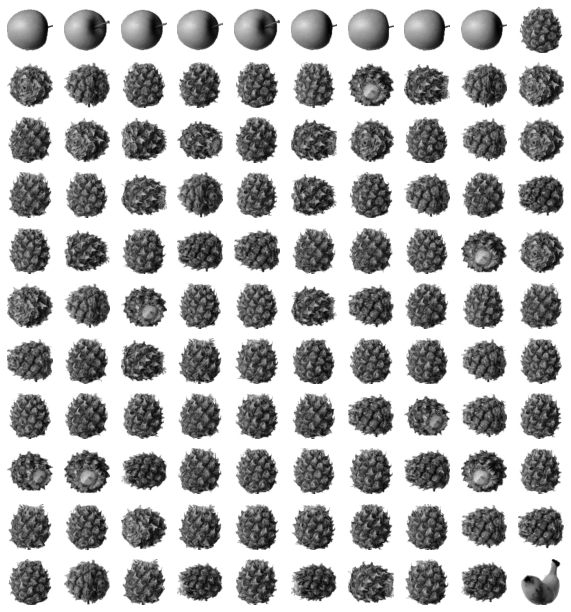

In [30]:
for label in range(0,3):
  draw_fruits(fruits[km.labels_==label])
  print("\n")

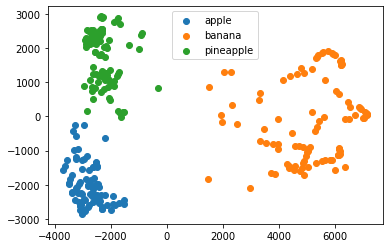

In [32]:
for label in range(0,3):
  data = fruits_pca[km.labels_==label]
  plt.scatter(data[:,0],data[:,1])
plt.legend(['apple','banana','pineapple'])
plt.show()